In [246]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math 
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
dataset = np.load('C:/Users/asoli/Documents/Maestria/5. Trimestre/Ciencia de Datos en Python/Proj_final/Data/proyecto_training_data.npy')

In [251]:
dataset.data.shape

(1460, 6)

completeData = pd.DataFrame(dataset)
completeData.rename(columns={0: "SalesPrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"}, inplace = True)
completeData.head()

In [408]:

completeData

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [417]:
dataset = pd.DataFrame(completeData, columns = ["SalesPrice", "OverallQual"])

In [418]:
dataset.head()

,SalesPrice,OverallQual
0,208500.0,7.0
1,181500.0,6.0
2,223500.0,7.0
3,140000.0,7.0
4,250000.0,8.0


In [436]:
x = completeData["OverallQual"]
y = completeData["SalesPrice"]

In [580]:
#Crear los datasets 80% para training y 20% para test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state = 5)
data_train, data_test = train_test_split(dataset, test_size = 0.20, random_state = 0)

In [581]:
#Ver las principales medidas de tendencia central
completeData.describe()

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


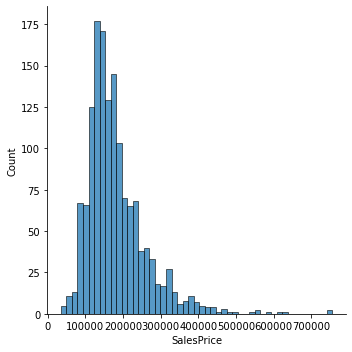

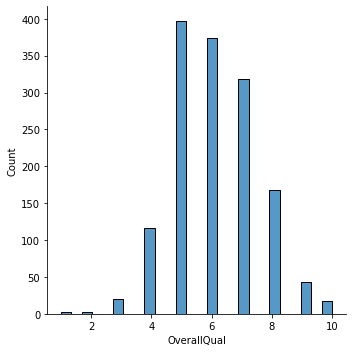

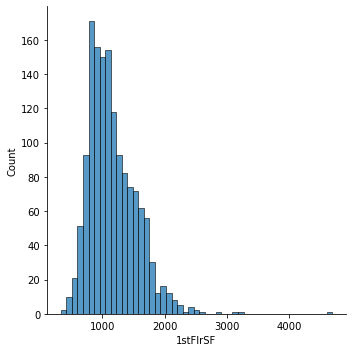

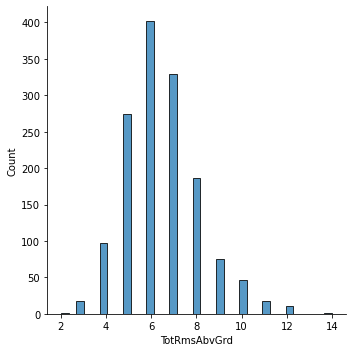

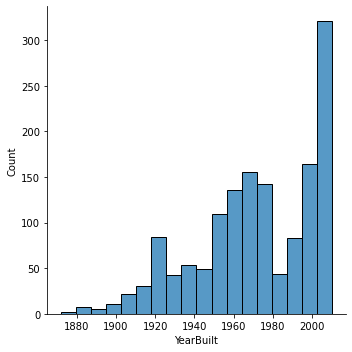

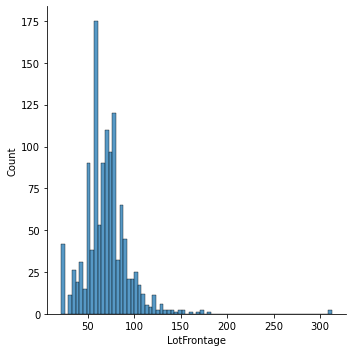

In [284]:
#Dibujar un histograma por cada una de las variables x
sns.displot(completeData["SalesPrice"])
sns.displot(completeData["OverallQual"])
sns.displot(completeData["1stFlrSF"])
sns.displot(completeData["TotRmsAbvGrd"])
sns.displot(completeData["YearBuilt"])
sns.displot(completeData["LotFrontage"])

<AxesSubplot:>

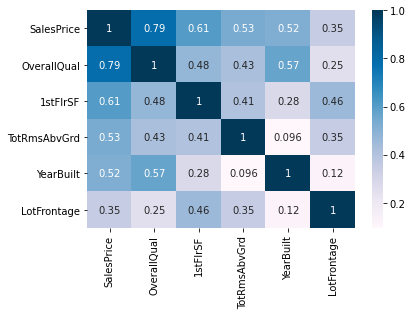

In [91]:
# De acuerdo con el mapa de calor la variable que más relación tiene con el precio de las casa es OverallQual, razón por la cual, las variables x/y definidas son OverallQual y Sales Price
sns.heatmap(dataset1.corr(method = "pearson"), annot=True, cmap = "PuBu")

Text(0.5, 1.0, 'OverallQual vs Price Corr: 0.79098')

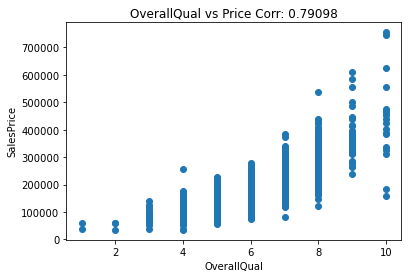

In [285]:
plt.scatter(completeData["OverallQual"], completeData["SalesPrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.title("OverallQual vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["OverallQual"]), 5)))

Text(0.5, 1.0, '1stFlrSF vs Price Corr: 0.60585')

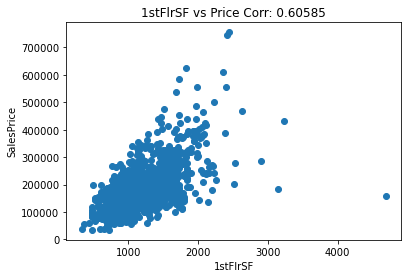

In [286]:
plt.scatter(completeData["1stFlrSF"], completeData["SalesPrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalesPrice")
plt.title("1stFlrSF vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["1stFlrSF"]), 5)))

Text(0.5, 1.0, 'TotRmsAbvGrd vs Price Corr: 0.53372')

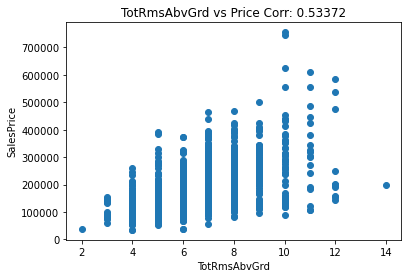

In [287]:
plt.scatter(completeData["TotRmsAbvGrd"], completeData["SalesPrice"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalesPrice")
plt.title("TotRmsAbvGrd vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["TotRmsAbvGrd"]), 5)))

Text(0.5, 1.0, 'YearBuilt vs Price Corr: 0.5229')

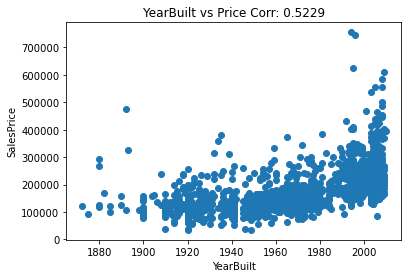

In [289]:
plt.scatter(completeData["YearBuilt"], completeData["SalesPrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.title("YearBuilt vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["YearBuilt"]), 5)))

Text(0.5, 1.0, 'LotFrontage vs Price Corr: 0.3518')

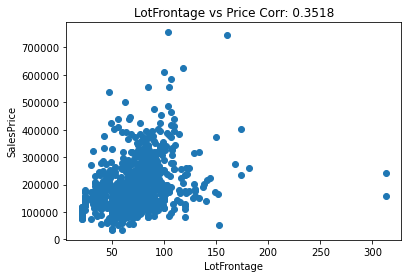

In [296]:
plt.scatter(completeData["LotFrontage"], completeData["SalesPrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalesPrice")
plt.title("LotFrontage vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["LotFrontage"]), 5)))

In [814]:
# Crear arreglo con variables X y Y
xtraining = np.array(train_x)
ytraining = np.array(train_y)
xtest = np.array(test_x)
ytest = np.array(test_y)
data_training = np.column_stack((xtraining, ytraining))
data_training

array([[6.000e+00, 1.775e+05],
       [5.000e+00, 1.190e+05],
       [5.000e+00, 1.250e+05],
       ...,
       [3.000e+00, 9.100e+04],
       [5.000e+00, 1.439e+05],
       [4.000e+00, 1.290e+05]])

In [770]:
#definición de variables
a = 2
b = 2
repeticiones = 10
learning_r = 0.01
error_cada = 10
casos = (repeticiones/error_cada)*error_cada


In [771]:
# Función costo
# La función almacena los valores de cada observación y el error elevado al cuadrado
def costo(x, y, a, b):
    n = len(x)
    error = 0.0
    #errores = np.empty((), float)
    errores = {}
    for i in range(n):
        y_hat = a+b*x[i]
        error += (y[i]-y_hat)**2
        #errores = np.append(errores, np.array([error]))
        evento = i+1
        #for i in evento:
            
        casos = (repeticiones/error_cada)
        if evento == casos:
            errores[evento] = error
            #casos = (repeticiones/error_cada) * error_cada
            #if casos[i] ==  

    return error/(2*n), errores

In [772]:
costo(xtraining, ytraining, a, b)

(19415639328.98202, {1: 31501280196.0})

In [808]:
#Función para generar los gradientes
def gradientes(x, y, a, b, alpha, epochs):
    n = len(x)
    coste = []
    grad_a = np.empty((), float)
    grad_b = np.empty((), float)
    grad = np.column_stack((grad_a, grad_b))
    #lista_temporal = []
    
    for e in range(epochs):
        a_grad = 0
        b_grad = 0
        resultados = {}
        for i in range(n):
            estimado = a+b*x[i]
            a_grad += estimado - y[i]
            b_grad += (estimado-y[i])*x[i]
            coste.append(costo(x, y, a, b))
            grad_a = np.append(grad_a, np.array([a_grad]))
            grad_b = np.append(grad_b, np.array([b_grad]))   
        a -= (a_grad/n)*alpha
        b -= (b_grad/n)*alpha  
        resultados[n] = (a, b)  
    return a, b, coste, resultados       

In [809]:
#Calculo de a y b así como de los resultados en cada repetición
a, b, coste, resultados = gradientes(x = xtraining, y = ytraining, a = a, b= b, alpha = alpha,  epochs = repeticiones)
a,b

(901.1383877253614, 30301.231298422023)

In [810]:
resultados

{1168: (901.1383877253614, 30301.231298422023)}

In [811]:
grad

array([[20.2, 20. ]])

Text(0.5, 1.0, 'Predicción con 10 repeticiones')

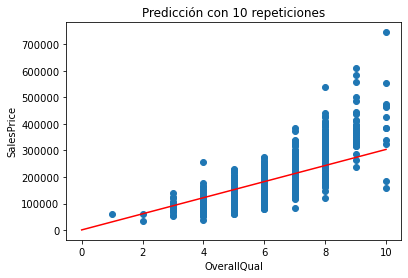

In [812]:
#Grafico con los resultados de a y b
plt.scatter(xtraining, ytraining)
pred_x = [0, max(xtraining)]
pred_y = [a+b*0, a+b*max(xtraining)]
plt.plot(pred_x, pred_y, "r")
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.title("Predicción con " + str(repeticiones) + " repeticiones")

Text(0.5, 1.0, 'Predicción con 10 repeticiones')

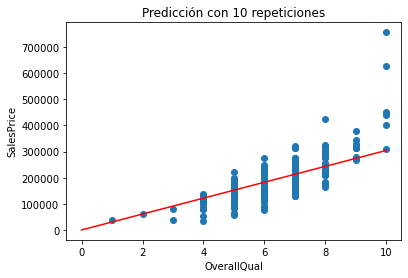

In [816]:
#Grafico con los resultados de a y b
plt.scatter(xtest, ytest)
pred_x = [0, max(xtest)]
pred_y = [a+b*0, a+b*max(xtest)]
plt.plot(pred_x, pred_y, "r")
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.title("Predicción con " + str(repeticiones) + " repeticiones")

In [ ]:
# Cálculo del error
